<a href="https://colab.research.google.com/github/florenciaolivares/Modulo-Tarea-3/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** El pársec se define como la distancia desde la que habría que observar el sistema solar para que la órbita terrestre subtenga un segundo de arco. Equivale a $3.26$ años luz o $3.086 \times 10^{16}$ metros. Un kilopársec, entonces, corresponde a $1000$ pársecs, o $3.086 \times 10^{19}$ metros.

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [147]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m = 3.086e19  # valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg

Text(0, 0.5, 'Velocidad (km/s)')

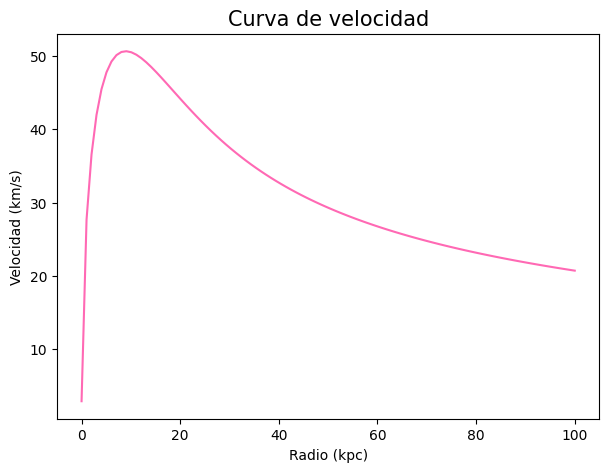

In [148]:
# Creamos la función M_star
def M_star(R, M_1, R_1):
  return M_1 * (1 - (np.exp(-R/R_1) * (R_1 + R)) / R_1)


# Creamos la función v_R_stars
def v_R_stars(R, M_1, R_1):   # Asumimos que los valores que ingresemos a la función ya estarán con las unidades correctas, así que no realizamos ninguna transformación dentro de ella.
  Mstar = M_star(R,M_1,R_1)
  return np.sqrt(G*1e-9 * Mstar / R)    # Cambiamos la constante de gravitación a km^3 kg^-1 s^-2


# Creamos el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01, 100, 100,dtype=float)
R_in_km = R * kpc_to_m /1000    # Pasamos de kilopársec a kilómetros


# Cálculo de v(R) en km/s
M1 = 1e10 * solar_masses_to_kg    # Pasamos a kg
R1 = 5 * kpc_to_m /1000     # Pasamos de kilopársec a kilómetros
v_r_stars = v_R_stars(R_in_km, M1, R1)    # Calculamos!


# Gráfico :)
plt.figure(figsize=(7,5))
plt.plot(R, v_r_stars, color="hotpink")
plt.title("Curva de velocidad" , fontsize=15)
plt.xlabel("Radio (kpc)")
plt.ylabel("Velocidad (km/s)")


3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Si R >> R1, R/R1 es muy grande $\implies$ -R/R1 es muy pequeño $\implies$ la exponencial de -R/R1 tiende a 0 $\implies$ la masa tiende a 0 $\implies$ la velocidad también tiende a 0.


 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


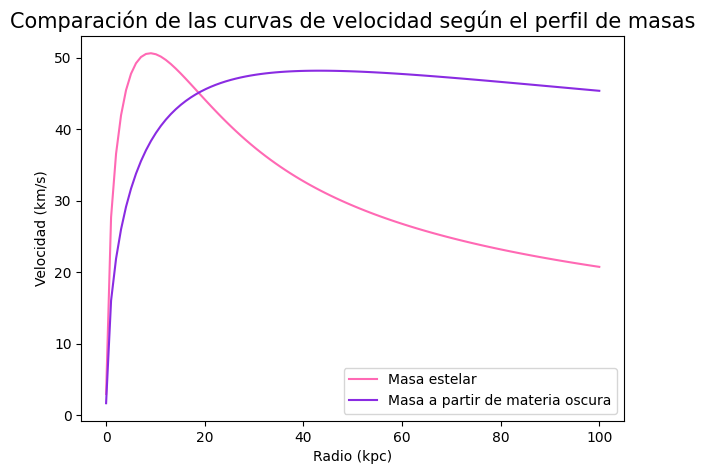

In [149]:
# Definimos la función M_dm
def M_dm(R, M0, R0):      # Nuevamente, asumimos que le entregaremos los valores en las unidades adecuadas
  return M0 * (np.log((R0+R)/R0) + R0/(R0+R) - 1)

# Creamos la función v_R_dm
def v_R_dm(R, M0, R0):
  Mdm = M_dm(R,M0,R0)     # Calculamos la masa según el perfil de materia oscura
  return np.sqrt(G*1e-9 * Mdm / R)     #Cambiamos la constante de gravitación a km^3 kg^-1 s^-2


# Utilizamos el mismo arreglo R de la parte anterior.
R = np.linspace(0.01, 100, 100,dtype=float)
R_in_km = R * kpc_to_m /1000      # Transformamos a las unidades correctas!

# Cálculo de v(R)
M0 = 5e10 * solar_masses_to_kg      # Transformamos a las unidades correctas
R0 = 20 * kpc_to_m / 1000
v_r_stars =  v_R_stars(R_in_km, M1, R1)     # Calculamos
v_r_dm = v_R_dm(R_in_km, M0, R0)

# Gráfico :)
plt.figure(figsize=(7,5))
plt.plot(R, v_r_stars, color="hotpink", label="Masa estelar")
plt.plot(R, v_r_dm, color = "blueviolet", label="Masa a partir de materia oscura")
plt.title("Comparación de las curvas de velocidad según el perfil de masas" , fontsize=15)
plt.xlabel("Radio (kpc)")
plt.ylabel("Velocidad (km/s)")
plt.legend(loc=4)

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** A distancias cortas domina la masa estelar, a distancias largas domina la materia oscura.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [150]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/Astro y Cs de Datos/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

Text(0, 0.5, 'Velocidad (km/s)')

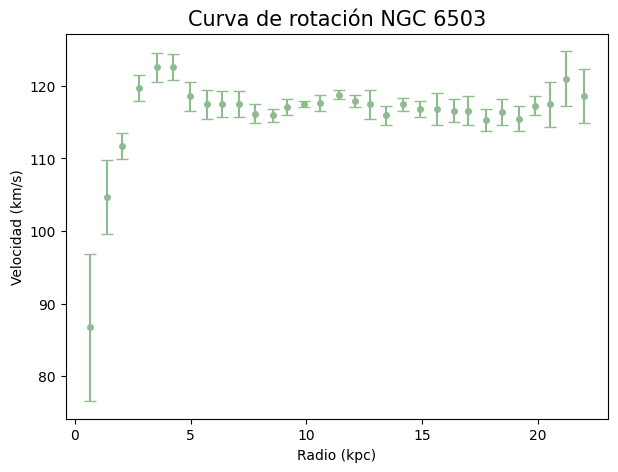

In [154]:
# Extraemos los datos del archivo
distancia_radial = datos[0:len(datos),0]      # La primera columna corresponde a los radios
velocidad_medida = datos[0:len(datos),1]      # La segunda columna corresponde a las velocidades
error_estandar = datos[0:len(datos),2]      # La tercera columna corresponde al error

# Gráfico de la curva de rotación incluyendo barras de error  :)
plt.figure(figsize=(7,5))
plt.errorbar(distancia_radial, velocidad_medida, yerr=error_estandar, capsize=4, marker='o', linestyle="", markersize=4, color="darkseagreen" )
plt.title("Curva de rotación NGC 6503" , fontsize=15)
plt.xlabel("Radio (kpc)")
plt.ylabel("Velocidad (km/s)")



Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** no lineal

In [153]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [78]:
# Escribimos la función v_R_tot
def v_R_tot(R, M0, R0, M1, R1):
  return np.sqrt((v_R_stars(R, M1, R1))**2 + (v_R_dm(R, M0, R0))**2)

# Utilizamos curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Condiciones iniciales: masas entre 1e10 y 1e11 masas solares, radios entre 1 y 20 kpc.
popt_stars, pcov_stars = curve_fit(v_R_stars, distancia_radial , velocidad_medida, p0=[1e10*solar_masses_to_kg, 1*kpc_to_m/1000], sigma=error_estandar)   #Consideramos M1 = 1e10*solar_masses_to_kg y R1 =  1*kpc_to_m/1000

popt_dm, pcov_dm = curve_fit(v_R_dm, distancia_radial , velocidad_medida, p0=[1e11*solar_masses_to_kg, 20*kpc_to_m/1000], sigma=error_estandar)     #Consideramos M0 = 1e11*solar_masses_to_kg y R0 =  20*kpc_to_m/1000

popt_tot, pcov_tot = curve_fit(v_R_tot , distancia_radial , velocidad_medida, p0=[1e11*solar_masses_to_kg, 20*kpc_to_m/1000, 1e10*solar_masses_to_kg, 1*kpc_to_m/1000], sigma=error_estandar)     # En P0 nos aseguramos de colocar las condiciones iniciales en el orden correcto

<ipython-input-78-79d0ba0ffdd9>:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_dm, pcov_dm = curve_fit(v_R_dm, distancia_radial , velocidad_medida, p0=[1e11*solar_masses_to_kg, 20*kpc_to_m/1000], sigma=error_estandar)
<ipython-input-48-a35989b37723>:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G*1e-9 * Mstar / R)
<ipython-input-78-79d0ba0ffdd9>:13: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_stars, pcov_stars = curve_fit(v_R_stars, distancia_radial , velocidad_medida, p0=[1e10*solar_masses_to_kg, 1*kpc_to_m/1000], sigma=error_estandar)
<ipython-input-78-79d0ba0ffdd9>:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_tot, pcov_tot = curve_fit(v_R_tot , distancia_radial , velocidad_medida, p0=[1e11*solar_masses_to_kg, 20*kpc_to_m/1000, 1e10*solar_masses_to_kg, 1*kpc_to_m/1000], sigma=error_estandar)


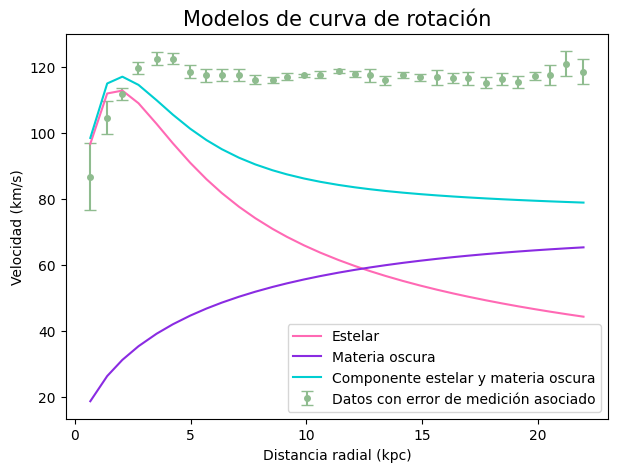

In [161]:
# Añadimos los 3 modelos al gráfico anterior.

plt.figure(figsize=(7,5))
plt.errorbar(distancia_radial, velocidad_medida, yerr=error_estandar, capsize=4, marker='o', linestyle="", markersize=4, color="darkseagreen",label="Datos con error de medición asociado" )
plt.plot(distancia_radial, v_R_stars(distancia_radial *kpc_to_m/1000, *popt_stars), label="Estelar", color="hotpink")
plt.plot(distancia_radial, v_R_dm(distancia_radial *kpc_to_m/1000, *popt_dm), label="Materia oscura", color="blueviolet")
plt.plot(distancia_radial, v_R_tot(distancia_radial *kpc_to_m/1000, *popt_tot), label="Componente estelar y materia oscura",color="darkturquoise")
plt.title("Modelos de curva de rotación" , fontsize=15)
plt.xlabel("Distancia radial (kpc)")
plt.ylabel("Velocidad (km/s)")
plt.legend(loc=4)

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [158]:
# Evaluamos los modelos en cada x_i
pred_tot = v_R_tot(distancia_radial*kpc_to_m/1000, *popt_tot )
pred_dm = v_R_dm(distancia_radial*kpc_to_m/1000, *popt_dm)
pred_stars = v_R_stars(distancia_radial*kpc_to_m/1000, *popt_stars)

# Definimos la función chi_cuadrado
def chi_cuadrado(datos, sigma, pred):
  return np.sum(((datos - pred)**2)/sigma**2)

# Reportamos el chi-cuadrado de cada modelo
print('Chi-cuadrado (dm+stars): ', chi_cuadrado(velocidad_medida, error_estandar, pred_tot))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(velocidad_medida, error_estandar, pred_dm))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(velocidad_medida, error_estandar, pred_stars))

Chi-cuadrado (dm+stars):  20098.588792508213
Chi-cuadrado (dm-only):  77361.91238968234
Chi-cuadrado (stars-only):  58832.72200491802


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?

El mejor modelo es aquel que considera tanto el componente esteral como la materia oscura, ya que su chi-cuadrado es considerablemente menor a los otros modelos. El peor, por otro lado, es el modelo que únicamente considera la materia oscura.

2. ¿Qué puede concluir de los constituyentes de la galaxia NGC6503?

Pareciera que esta galaxia tiene gran cantidad de materia oscura, pues en vez de reducir su velocidad de rotación a medida que se aleja del centro, su curva de velocidad se mantiene constante, tal como predice el modelo de materia oscura.


## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [163]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:** random.seed se utiliza para guardar el estado de una función aleatoria, de tal forma que se generen los mismos números aleatorios en múltiples ejecuciones del código. Esto permite repetir los experimentos y comparar los resultados.
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

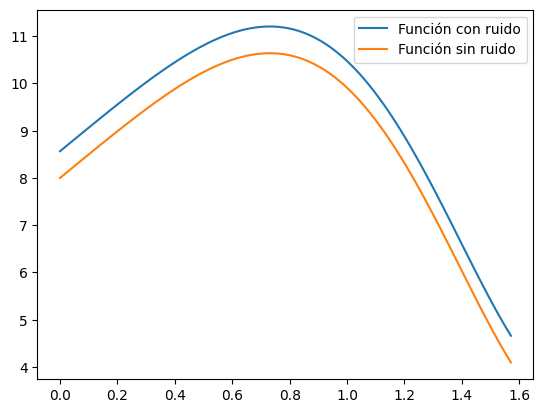

In [166]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
y_real = 5*np.sin(x) + 5*np.cos(x**2) + 3

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2


y_ruido = y_real + np.random.normal(loc=0, scale= 2) #Mu(promedio) = 0 y Sigma(desviación estándar) =2

# Visualice sus datos :)
plt.plot(x, y_ruido, label="Función con ruido")
plt.plot(x, y_real, label="Función sin ruido")
plt.legend()
# Puede graficar la función sin ruido si así lo desea. (opcional)


Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [167]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [171]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [172]:
#Toda esta parte la hice repitiendo los pasos del Jupyter Notebook de la Clase 3
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y_ruido,train_size=0.75)
  for j in range(10):
    poly = PolynomialFeatures(degree=j+1, include_bias=True)
    poly_features = poly.fit_transform(x_train.reshape(-1, 1))     # genera la matriz de diseño del polonomio :)
    poly_test = poly.fit_transform(x_test.reshape(-1,1))           # matriz de diseño para el dataset de testeo
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)                     # esta parte hace el álgebra lineal
    y_predicted = poly_reg_model.predict(poly_test)
    errores_modelos[j,i] = mean_squared_error(y_test, y_predicted)

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

Text(0, 0.5, 'Error cuadrático medio')

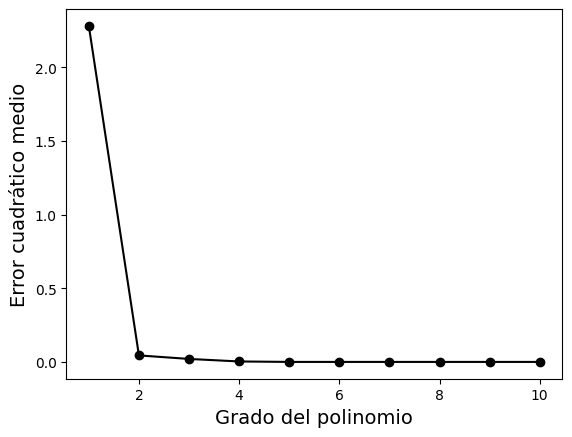

In [173]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?
# Añada su gráfico.

promedio_modelos =  np.mean(errores_modelos, axis=1)
plt.plot(np.arange(1,11), promedio_modelos, 'o-', color='black')
plt.xlabel('Grado del polinomio', fontsize=14)
plt.ylabel('Error cuadrático medio', fontsize=14)

El grado óptimo del polinomio es..... 9!